In [46]:
#import
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#https://github.com/meauxt/credit-card-default/blob/master/credit_card_default.ipynb
#https://github.com/alexpnt/default-credit-card-prediction/tree/master/src/core

In [51]:
# data import
missing_values=["n/a","na","--"]
rawData = pd.read_csv("/Users/csrxr/Desktop/Data_Analytics/Course05/t4Modified.csv", na_values=missing_values)

rawData.head(10)

rawData.columns =[x.lower() for x in rawData.columns]
rawData = rawData.rename(index=str,columns={"pay_0": "pay_1"})

rawData.columns



Index(['unnamed: 0', 'limit_bal', 'sex', 'education', 'marriage', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1',
       'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month', 'target', 'sex_des', 'marriage_des',
       'age_cat', 'age_val'],
      dtype='object')

In [52]:
features = rawData[[ 'sex', 'education', 'marriage', 'age_val', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'pay_amt1',
       'pay_amt2', 'pay_amt5', 'pay_amt6']]

In [53]:
#Features
features

,sex,education,marriage,age_val,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt2,bill_amt3,bill_amt4,bill_amt5,pay_amt1,pay_amt2,pay_amt5,pay_amt6
0,2,2,1,0,2,2,-1,-1,-2,-2,3102,689,0,0,0,689,0,0
1,2,2,2,0,-1,2,0,0,0,2,1725,2682,3272,3455,0,1000,0,2000
2,2,2,2,2,0,0,0,0,0,0,14027,13559,14331,14948,1518,1500,1000,5000
3,2,2,1,3,0,0,0,0,0,0,48233,49291,28314,28959,2000,2019,1069,1000
4,1,2,1,5,-1,0,-1,0,0,0,5670,35835,20940,19146,2000,36681,689,679
5,1,1,2,3,0,0,0,0,0,0,57069,57608,19394,19619,2500,1815,1000,800
6,1,1,2,1,0,0,0,0,0,0,412023,445007,542653,483003,55000,40000,13750,13770
7,2,2,2,0,0,-1,-1,0,0,-1,380,601,221,-159,380,601,1687,1542
8,2,3,1,1,0,0,2,0,0,0,14096,12108,12211,11793,3329,0,1000,1000
9,1,3,2,3,-2,-2,-2,-2,-1,-1,0,0,0,13007,0,0,1122,0


In [54]:
#dependent variable
depVar = rawData['target']
depVar.head(10)

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int64

In [55]:
#Trainiung Set
x_train = (features[:1000])
x_train.head()

,sex,education,marriage,age_val,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt2,bill_amt3,bill_amt4,bill_amt5,pay_amt1,pay_amt2,pay_amt5,pay_amt6
0,2,2,1,0,2,2,-1,-1,-2,-2,3102,689,0,0,0,689,0,0
1,2,2,2,0,-1,2,0,0,0,2,1725,2682,3272,3455,0,1000,0,2000
2,2,2,2,2,0,0,0,0,0,0,14027,13559,14331,14948,1518,1500,1000,5000
3,2,2,1,3,0,0,0,0,0,0,48233,49291,28314,28959,2000,2019,1069,1000
4,1,2,1,5,-1,0,-1,0,0,0,5670,35835,20940,19146,2000,36681,689,679


In [56]:
#Dep Variable
y_train = depVar[:1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y trainiung set are :',str(y_train_count))
y_train.head()

The number of observations in the Y trainiung set are : 1000


0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [57]:
#Geround Truth (y_test)
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are :', str(y_test_count))
y_test.head()

The number of observations in the Y training set are : 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: target, dtype: int64

In [58]:
x = features    
y = depVar

# Cross Validation

In [59]:
#x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20)

In [60]:
x_train.shape, x_test.shape

((24000, 18), (6000, 18))

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)
x_train.shape, x_test.shape

((18000, 18), (6000, 18))

## Random Forest Classification

In [62]:
#Models
modelRF = RandomForestClassifier()



In [63]:
modelRF.fit(x_train,y_train)

/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/csrxr/anaconda3/lib/python3.7/site-pa

RF: 0.805112 (0.007369)
KNN: 0.760167 (0.006324)
DT: 0.728278 (0.010122)
GTB: 0.819667 (0.007366)
ADA: 0.818778 (0.005840)


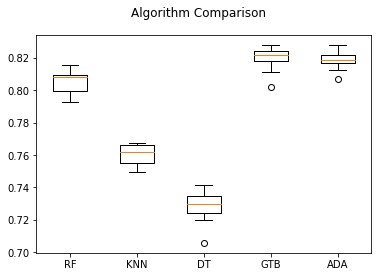

In [81]:
# https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

models = []
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GTB',GradientBoostingClassifier()))
models.append(('ADA',AdaBoostClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=41)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) 

    
    # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [79]:
#Models
modelDT = DecisionTreeClassifier(random_state=41,max_leaf_nodes=3)
modelRF = RandomForestClassifier(random_state=41)
modelKNN = KNeighborsClassifier(n_neighbors = 5)

modelADA = AdaBoostClassifier(random_state=41,n_estimators=15)
modelGTB= GradientBoostingClassifier(random_state=41,n_estimators=15)

# Random Forest Regression Model Fitting and Scoring

In [83]:
modelRF.fit(x_train,y_train)
print(cross_val_score(modelRF,x_train,y_train))
modelRF.score(x_train,y_train)

/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80153308 0.80583333 0.80596766]


0.9728888888888889

# Decission Tree

In [84]:
modelDT.fit(x_train,y_train)
print(cross_val_score(modelDT, x_train, y_train)) 
modelDT.score(x_train,y_train)

[0.81853024 0.82266667 0.82163694]


/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8209444444444445

# KNN

In [85]:
modelKNN.fit(x_train,y_train)
print(cross_val_score(modelKNN, x_train, y_train)) 
modelKNN.score(x_train,y_train)

/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.75687385 0.7645     0.76329388]


0.8180555555555555

# ADA

In [86]:
modelADA.fit(x_train,y_train)
print(cross_val_score(modelADA, x_train, y_train)) 
modelADA.score(x_train,y_train)

/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81736377 0.81616667 0.81846974]


0.8181666666666667

# GTB

In [87]:
modelGTB.fit(x_train,y_train)
print(cross_val_score(modelGTB, x_train, y_train)) 
modelGTB.score(x_train,y_train)

/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81736377 0.81933333 0.81946991]


0.8222777777777778

# RF Predictions 

In [88]:
predictions = modelRF.predict(x_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
rmse = sqrt (mean_squared_error(y_test,predictions))

predRsquared = r2_score(y_test,predictions)

#Make Predictions
predictions = modelRF.predict(x_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.167
RMSE: 0.458


## RF Plotting

ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 6000, 'y' with size 6000.

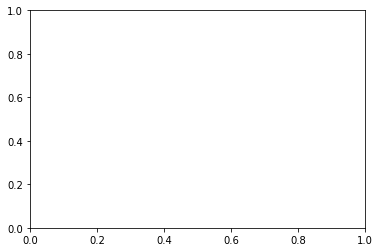

In [73]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();